## Real data

Die Daten im Notebook 03_data.ipynb habe ich für euch vorbereitet. 
Leider begegnen uns Daten in den meisten Fällen nicht so schön maschinenlesbar. 
Die Wahrheit ist: Da draußen ist der Daten-Dschungel und es ist gar nicht so einfach das, was wir brauchen, da rauszuziehen. 

**So findest du die bittere Wahrheit heraus** 
- Gehe auf [https://www-genesis.destatis.de/] 
- suche nach 'Durchschnittsalter der habilitierten Personen'. 
- Dann auf 'Werteabruf' und die Tabelle bitte als 'Flat' in ./data abspeichern.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999

In [92]:
df = pd.read_csv('./data/21351-0002_flat.csv')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 8, saw 3


### Huppla - was ist passiert?

Schau dir die Tabelle in einem Tabellenprogramm an.
Was fällt dir auf?

- In deutschen Tabellen wird ';' statt ',' als Trenner für .csvs verwendet
- Dafür schreiben wir in Deutschland '42,3' statt '42.3'
- In der Tabelle gibt es fehlende Werte, die mit '-'
- Oft wird auch nicht das weltweit gebräuchliche 'uft-8' als Zeichenformat verwendet, sondern 'latin-1' oder 'iso-8859-1'

In [93]:
df = pd.read_csv('./data/21351-0002_flat.csv', sep=';', decimal=',', encoding='latin-1')
# sep steht für seperator, also Trennzeichen
# decimal soll '42,3' automatisch in '42.3' umwandeln
# encoding gibt das Zeichenformat an

In [94]:
df.head(20)

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,1_Auspraegung_Code,1_Auspraegung_Label,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,2_Auspraegung_Label,3_Merkmal_Code,3_Merkmal_Label,3_Auspraegung_Code,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
0,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SKW,Geisteswissenschaften,GES,Geschlecht,GESM,männlich,"42,9"
1,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SKW,Geisteswissenschaften,GES,Geschlecht,GESW,weiblich,"41,6"
2,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SKW,Geisteswissenschaften,GES,Geschlecht,NaN,Insgesamt,"42,4"
3,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SPR,Sport,GES,Geschlecht,GESM,männlich,"41,5"
4,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SPR,Sport,GES,Geschlecht,GESW,weiblich,"39,3"
5,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-SPR,Sport,GES,Geschlecht,NaN,Insgesamt,"40,8"
6,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-RWSW,"Rechts-, Wirtschafts- und Sozialwissenschaften",GES,Geschlecht,GESM,männlich,"39,7"
7,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-RWSW,"Rechts-, Wirtschafts- und Sozialwissenschaften",GES,Geschlecht,GESW,weiblich,"40,8"
8,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-RWSW,"Rechts-, Wirtschafts- und Sozialwissenschaften",GES,Geschlecht,NaN,Insgesamt,"40,0"
9,21351,Statistik der Habilitationen,JAHR,Jahr,2010,DINSG,Deutschland insgesamt,DG,Deutschland,BILFG1,Fächergruppen,FACHGR-NATW,"Mathematik, Naturwissenschaften",GES,Geschlecht,GESM,männlich,"40,1"


### Puh, das sind viele Spalten!

In [95]:
# Zeige alle Spalten an 
df.columns

Index(['Statistik_Code', 'Statistik_Label', 'Zeit_Code', 'Zeit_Label', 'Zeit',
       '1_Merkmal_Code', '1_Merkmal_Label', '1_Auspraegung_Code',
       '1_Auspraegung_Label', '2_Merkmal_Code', '2_Merkmal_Label',
       '2_Auspraegung_Code', '2_Auspraegung_Label', '3_Merkmal_Code',
       '3_Merkmal_Label', '3_Auspraegung_Code', '3_Auspraegung_Label',
       'BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre'],
      dtype='object')

In [96]:
# So wählst du aus, welche Spalten du behalten willst
df = df[['Statistik_Label', 
         'Zeit', 
         '2_Auspraegung_Label',
         '3_Auspraegung_Label',
         'BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre']]

In [97]:
df.head()

,Statistik_Label,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
0,Statistik der Habilitationen,2010,Geisteswissenschaften,männlich,"42,9"
1,Statistik der Habilitationen,2010,Geisteswissenschaften,weiblich,"41,6"
2,Statistik der Habilitationen,2010,Geisteswissenschaften,Insgesamt,"42,4"
3,Statistik der Habilitationen,2010,Sport,männlich,"41,5"
4,Statistik der Habilitationen,2010,Sport,weiblich,"39,3"


In [98]:
# So kannst du ausgewählte Spalten weglassen 
df.drop(['Statistik_Label'], axis='columns', inplace=True)

In [99]:
# So sieht die Tabelle schon übersichtlicher aus
df.sample(5)

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
136,2014,Sport,weiblich,"38,1"
83,2012,Veterinärmedizin,Insgesamt,"41,1"
299,2019,Geisteswissenschaften,Insgesamt,"43,7"
37,2011,Sport,weiblich,.
234,2017,Sport,männlich,"41,3"


## Daten filtern

Wir müssen auswählen, was wir als in der Grafik darstellen wollen. Sagen wir mal uns interessiert besonders, wie sich das Alter bei der Habilitation im Bereich Kunst- und Kunstgeschichte Insgesamt verändert hat:

In [100]:
# So wählst du den DataFrame aus, wo die Spalte "2_Ausprägung_Label" den Wert 'Kunst, Kunstgeschichte' enthält 
df[(df["2_Auspraegung_Label"] == 'Kunst, Kunstwissenschaft')]

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
27,2010,"Kunst, Kunstwissenschaft",männlich,"45,0"
28,2010,"Kunst, Kunstwissenschaft",weiblich,"47,6"
29,2010,"Kunst, Kunstwissenschaft",Insgesamt,"46,1"
60,2011,"Kunst, Kunstwissenschaft",männlich,"45,3"
61,2011,"Kunst, Kunstwissenschaft",weiblich,"45,4"
62,2011,"Kunst, Kunstwissenschaft",Insgesamt,"45,4"
93,2012,"Kunst, Kunstwissenschaft",männlich,"41,9"
94,2012,"Kunst, Kunstwissenschaft",weiblich,"47,1"
95,2012,"Kunst, Kunstwissenschaft",Insgesamt,"45,1"
126,2013,"Kunst, Kunstwissenschaft",männlich,"41,5"


In [101]:
# Wenn du nur die Daten für 'Insgesamt' auswählen willst
df[(df["2_Auspraegung_Label"] == 'Kunst, Kunstwissenschaft') & (df["3_Auspraegung_Label"] == 'Insgesamt')]

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
29,2010,"Kunst, Kunstwissenschaft",Insgesamt,"46,1"
62,2011,"Kunst, Kunstwissenschaft",Insgesamt,"45,4"
95,2012,"Kunst, Kunstwissenschaft",Insgesamt,"45,1"
128,2013,"Kunst, Kunstwissenschaft",Insgesamt,"45,1"
161,2014,"Kunst, Kunstwissenschaft",Insgesamt,"43,3"
194,2015,"Kunst, Kunstwissenschaft",Insgesamt,"44,4"
227,2016,"Kunst, Kunstwissenschaft",Insgesamt,"44,6"
260,2017,"Kunst, Kunstwissenschaft",Insgesamt,"45,2"
293,2018,"Kunst, Kunstwissenschaft",Insgesamt,"44,5"
326,2019,"Kunst, Kunstwissenschaft",Insgesamt,"48,1"


In [102]:
# Wenn du für Kunstgeschichte die Daten für 'männlich' oder 'weiblich' auswählen willst
df[(df["2_Auspraegung_Label"] == 'Kunst, Kunstwissenschaft') & ((df["3_Auspraegung_Label"] == 'weiblich') | (df["3_Auspraegung_Label"] =='männlich')) ]

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
27,2010,"Kunst, Kunstwissenschaft",männlich,"45,0"
28,2010,"Kunst, Kunstwissenschaft",weiblich,"47,6"
60,2011,"Kunst, Kunstwissenschaft",männlich,"45,3"
61,2011,"Kunst, Kunstwissenschaft",weiblich,"45,4"
93,2012,"Kunst, Kunstwissenschaft",männlich,"41,9"
94,2012,"Kunst, Kunstwissenschaft",weiblich,"47,1"
126,2013,"Kunst, Kunstwissenschaft",männlich,"41,5"
127,2013,"Kunst, Kunstwissenschaft",weiblich,"46,9"
159,2014,"Kunst, Kunstwissenschaft",männlich,"43,4"
160,2014,"Kunst, Kunstwissenschaft",weiblich,"43,0"


In [103]:
# Wenn du dir sicher bist, dass das richtige gefiltert wird,kannst du einen neuen DataFrame erzeugen. So bleiben die Ursprungsdaten erhalten.
kunst = df[(df["2_Auspraegung_Label"] == 'Kunst, Kunstwissenschaft') & ((df["3_Auspraegung_Label"] == 'weiblich') | (df["3_Auspraegung_Label"] =='männlich')) ]

In [104]:
kunst

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
27,2010,"Kunst, Kunstwissenschaft",männlich,"45,0"
28,2010,"Kunst, Kunstwissenschaft",weiblich,"47,6"
60,2011,"Kunst, Kunstwissenschaft",männlich,"45,3"
61,2011,"Kunst, Kunstwissenschaft",weiblich,"45,4"
93,2012,"Kunst, Kunstwissenschaft",männlich,"41,9"
94,2012,"Kunst, Kunstwissenschaft",weiblich,"47,1"
126,2013,"Kunst, Kunstwissenschaft",männlich,"41,5"
127,2013,"Kunst, Kunstwissenschaft",weiblich,"46,9"
159,2014,"Kunst, Kunstwissenschaft",männlich,"43,4"
160,2014,"Kunst, Kunstwissenschaft",weiblich,"43,0"


## Visualisierung

In [105]:
kunst

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
27,2010,"Kunst, Kunstwissenschaft",männlich,"45,0"
28,2010,"Kunst, Kunstwissenschaft",weiblich,"47,6"
60,2011,"Kunst, Kunstwissenschaft",männlich,"45,3"
61,2011,"Kunst, Kunstwissenschaft",weiblich,"45,4"
93,2012,"Kunst, Kunstwissenschaft",männlich,"41,9"
94,2012,"Kunst, Kunstwissenschaft",weiblich,"47,1"
126,2013,"Kunst, Kunstwissenschaft",männlich,"41,5"
127,2013,"Kunst, Kunstwissenschaft",weiblich,"46,9"
159,2014,"Kunst, Kunstwissenschaft",männlich,"43,4"
160,2014,"Kunst, Kunstwissenschaft",weiblich,"43,0"


In [106]:
kunst = kunst.pivot(index='Zeit', columns='3_Auspraegung_Label', values='BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre')

In [107]:
kunst

3_Auspraegung_Label,männlich,weiblich
Zeit,,
2010,"45,0","47,6"
2011,"45,3","45,4"
2012,"41,9","47,1"
2013,"41,5","46,9"
2014,"43,4","43,0"
2015,"44,3","44,5"
2016,"43,1","45,0"
2017,"45,6","44,6"
2018,"43,5","45,6"


In [108]:
kunst.plot()

TypeError: no numeric data to plot

### Hm, das mit dem Zahlenformat hat nicht geklappt

In [109]:
# In der Spalte mit dem Durchschnittsalter ist das Komma leider nicht korrekt ersetzt worden. Shit happens.
# Eine einzelne Spalte kann mit df.Name_der_Spalte aufgerufen werden. (Falls der Name der Spalte Leerzeichen oder Sonderzeichen enthält mit df['Name der Spalte'])
kunst.männlich

Zeit
2010    45,0
2011    45,3
2012    41,9
2013    41,5
2014    43,4
2015    44,3
2016    43,1
2017    45,6
2018    43,5
2019    50,1
Name: männlich, dtype: object

In [110]:
# Dass das nicht geklappt hat, liegt daran, dass es ürsprünglich mal fehlende Werte gab, die das Zeichen '-' enthalten haben (Bei 'Veterinärmedizin' gibt es in der .csv von destatis keine Daten ab 2015)
# Durch das Filtern sind wir diese seltsamen Werte losgeworden. Leider enthalten unsere Werte immer noch ',' statt '.'.
# Um zu sehen, welche Werte vorhanden sind, kannst du zum Beispiel zählen lassen, wie welche Werte wie oft vorkommen.   
kunst.weiblich.value_counts()

45,4    2
47,6    1
46,9    1
45,6    1
47,1    1
45,0    1
44,6    1
44,5    1
43,0    1
Name: weiblich, dtype: int64

In [111]:
# Also bereinigen wir die Spalte selbst. Pandas ist gut darin, Strings zu verändern. In diesem Fall wollen wir in unserer Spalte ',' durch '.' ersetzen
kunst.männlich = kunst.männlich.str.replace(',', '.')
kunst.weiblich = kunst.weiblich.str.replace(',', '.')

In [112]:
kunst.head()

3_Auspraegung_Label,männlich,weiblich
Zeit,,
2010,45.0,47.6
2011,45.3,45.4
2012,41.9,47.1
2013,41.5,46.9
2014,43.4,43.0


In [113]:
# Die ',' wurden zwar durch '.' ersetzt, aber der Datentyp ist immer noch 'Object'. Wir brauchen aber numerische Daten (int, float) zum plotten. 
kunst.dtypes

3_Auspraegung_Label
männlich    object
weiblich    object
dtype: object

In [114]:
kunst.plot()

TypeError: no numeric data to plot

In [115]:
# So änderst du den Datentyp auf float
kunst.männlich = kunst.männlich.astype('float')
kunst.weiblich = kunst.weiblich.astype('float')

In [116]:
kunst

3_Auspraegung_Label,männlich,weiblich
Zeit,,
2010,45.0,47.6
2011,45.3,45.4
2012,41.9,47.1
2013,41.5,46.9
2014,43.4,43.0
2015,44.3,44.5
2016,43.1,45.0
2017,45.6,44.6
2018,43.5,45.6


<AxesSubplot:xlabel='Zeit'>

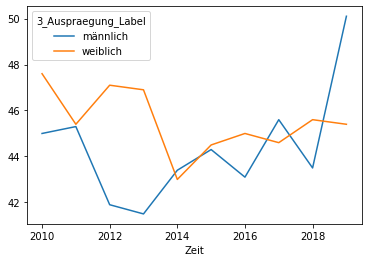

In [117]:
kunst.plot()

<AxesSubplot:xlabel='Zeit'>

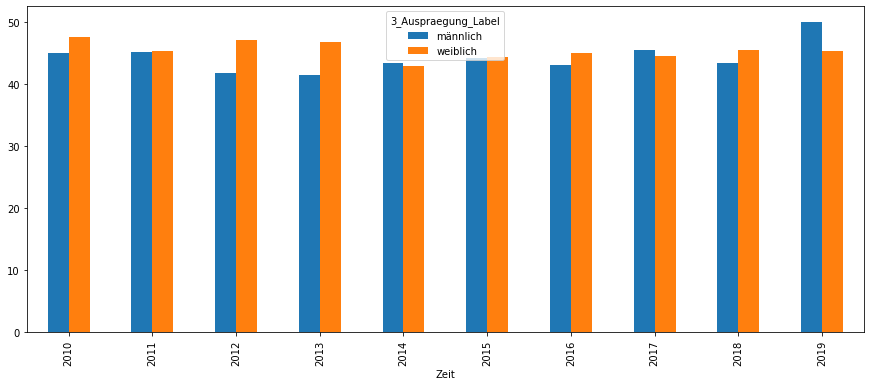

In [118]:
kunst.plot(kind="bar", figsize=(15,6))

## Übung

In [119]:
# Zeige, wie sich das Durchschnittsalter der habilitierten Personen in Deutschland insgesamt verändert hat

insgesamt = df[(df["2_Auspraegung_Label"] == 'Insgesamt') & (df["3_Auspraegung_Label"] == 'Insgesamt')]

In [120]:
insgesamt = insgesamt.set_index('Zeit')

In [121]:
insgesamt.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = insgesamt.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.str.replace(',', '.')

In [122]:
insgesamt.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = insgesamt.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.astype('float')

<AxesSubplot:xlabel='Zeit'>

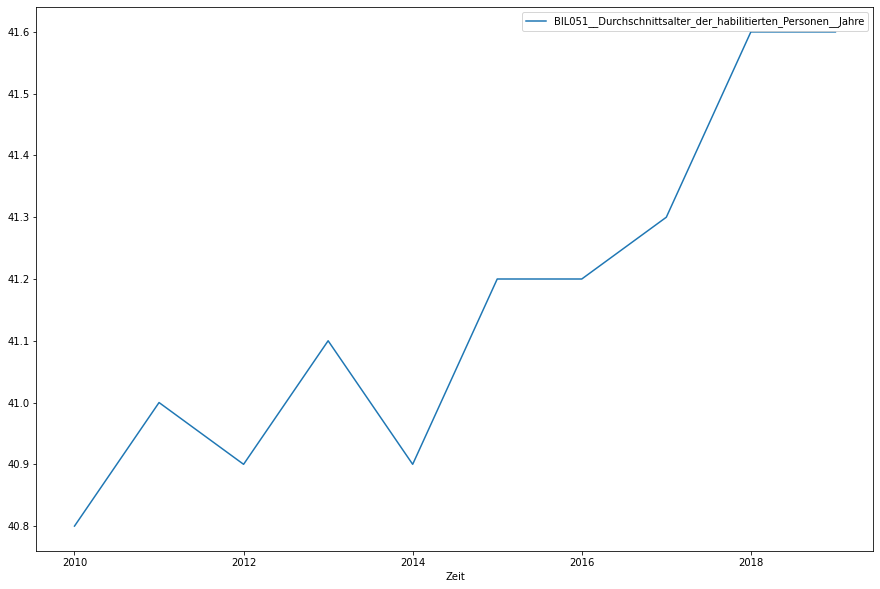

In [123]:
# Stelle die Veränderung in einem Linechart dar

insgesamt.plot(figsize=(15,10))

## Gruppieren

### In welchem Bereich ist das Habilitationsalter am höchsten?

Um Durchschnitte berechnen zu können, muss die Werte Spalte den Datentyp 'float' haben, also ausschließlich Nummern enthalten.

In [127]:
df.dtypes

Zeit                                                             int64
2_Auspraegung_Label                                             object
3_Auspraegung_Label                                             object
BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre    object
dtype: object

Um die Spalte zu bereinigen:

- müssen wir den kompletten Datensatz von fehlendenden Werten befreien
- müssen wir die Spalte in numerische Werte umwandeln 

In [128]:
# Durch value_counts sehen wir, dass häufig '-' bei fehlenden Daten auftaucht.
df['BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre'].value_counts().head()

-       45
40,8    17
41,0    12
41,1    11
40,9    11
Name: BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre, dtype: int64

In [129]:
# Anzeigen, in welchen Fällen das so ist:
df[df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre == '-']

,Zeit,2_Auspraegung_Label,3_Auspraegung_Label,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
21,2010,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",männlich,-
22,2010,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",weiblich,-
23,2010,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",Insgesamt,-
54,2011,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",männlich,-
55,2011,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",weiblich,-
56,2011,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",Insgesamt,-
87,2012,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",männlich,-
88,2012,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",weiblich,-
89,2012,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",Insgesamt,-
120,2013,"Agrar-, Forst- u.Ernährungswiss., Veterinärmed...",männlich,-


In [130]:
# Die entsprechenden Fachrichtungen aussortieren
df = df[(df['2_Auspraegung_Label'] != 'Veterinärmedizin') & 
        (df['2_Auspraegung_Label'] != 'Agrar-, Forst- und Ernährungswissenschaften') & 
        (df['2_Auspraegung_Label'] != 'Agrar-, Forst- u.Ernährungswiss., Veterinärmedizin') &
        (df['2_Auspraegung_Label'] != 'Sport')
       ]

In [131]:
# ',' Werte durch '.' ersetzen
df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.str.replace(',', '.')

In [132]:
# Datentyp auf float ändern
df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre = df.BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre.astype('float')

In [133]:
# So wird der Durchschnitt der Jahre gebildet
alter_im_schnitt = df.groupby('2_Auspraegung_Label').mean().round(2).sort_values('BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre', ascending=False)
alter_im_schnitt

,Zeit,BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre
2_Auspraegung_Label,,
"Kunst, Kunstwissenschaft",2014.5,45.02
Geisteswissenschaften,2014.5,42.98
Ingenieurwissenschaften,2014.5,42.56
Insgesamt,2014.5,41.23
"Mathematik, Naturwissenschaften",2014.5,40.95
Humanmedizin/Gesundheitswissenschaften,2014.5,40.70
"Rechts-, Wirtschafts- und Sozialwissenschaften",2014.5,40.33


Hier noch mal Schritt für Schitt erklärt:

Um das Alter im Schnitt zu berechnen
- gruppieren wir nach '2_Ausprägung_Label': .groupby('2_Auspraegung_Label')
- nehmen jeweils den Durchschnitt: .mean()
- runden das Ergebnis auf 2 Stellen: .round(2)
- sortieren die Werte absteigend: .sort_values('BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre', ascending=False)

<AxesSubplot:title={'center':'Durchschnittsalter der habilitierten Personen'}, ylabel='2_Auspraegung_Label'>

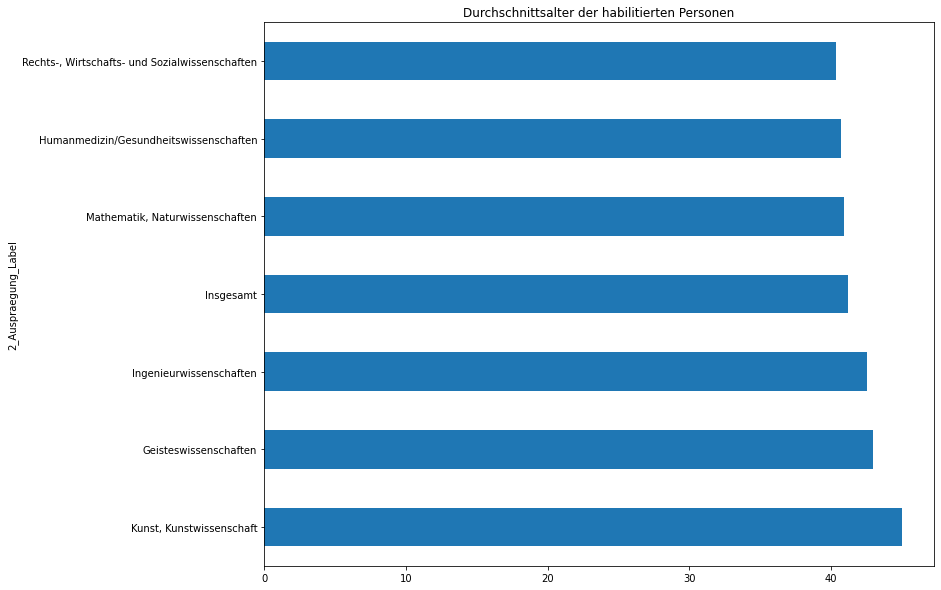

In [134]:
# Daten plotten
alter_im_schnitt.plot.barh(y='BIL051__Durchschnittsalter_der_habilitierten_Personen__Jahre', 
                                           legend=False, 
                                           title="Durchschnittsalter der habilitierten Personen",
                                          figsize=(12,10))

## Übung

Aus welchem Gebiet stammen im Schnitt die jüngsten männlichen Eingebürgerten?

- Suche auf [https://www-genesis.destatis.de/] nach 'Durchschnittsalter der Eingebürgerten: Deutschland, Jahre, Ländergruppierungen/Staatsangehörigkeit, Geschlecht,Familienstand
- Lade den Datensatz als Flat.csv herunter
- Lesen ihn als DataFrame ein
- Wähle folgende Spalten aus: '2_Auspraegung_Label', '3_Auspraegung_Label', '4_Auspraegung_Label', 'BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre'
- Filtere auf 'männlich' und 'ledig
- Sortiere den Datensatz nach dem Durchschnittsalter 

In [135]:
df = pd.read_csv('./data/12511-0007_flat.csv', sep=';', decimal=',', encoding='latin-1')

In [136]:
df.columns

Index(['Statistik_Code', 'Statistik_Label', 'Zeit_Code', 'Zeit_Label', 'Zeit',
       '1_Merkmal_Code', '1_Merkmal_Label', '1_Auspraegung_Code',
       '1_Auspraegung_Label', '2_Merkmal_Code', '2_Merkmal_Label',
       '2_Auspraegung_Code', '2_Auspraegung_Label', '3_Merkmal_Code',
       '3_Merkmal_Label', '3_Auspraegung_Code', '3_Auspraegung_Label',
       '4_Merkmal_Code', '4_Merkmal_Label', '4_Auspraegung_Code',
       '4_Auspraegung_Label',
       'BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre'],
      dtype='object')

In [137]:
df = df[['2_Auspraegung_Label', '3_Auspraegung_Label', '4_Auspraegung_Label', 'BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre']]

In [138]:
df.head()

,2_Auspraegung_Label,3_Auspraegung_Label,4_Auspraegung_Label,BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre
0,männlich,ledig,Insgesamt,24
1,männlich,ledig,Europa,25
2,männlich,ledig,EU-28 (seit 01.07.2013),27
3,männlich,ledig,Drittstaaten zu EU-28 (seit 01.07.2013),22
4,männlich,ledig,EU-27 (bis 30.06.2013),28


In [139]:
df['2_Auspraegung_Label'].value_counts()

männlich    273
weiblich    273
Name: 2_Auspraegung_Label, dtype: int64

In [140]:
df = df[(df['2_Auspraegung_Label'] == 'männlich') & 
        (df['3_Auspraegung_Label'] == 'ledig')]

In [141]:
df.sort_values('BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre', ascending=True).head()

,2_Auspraegung_Label,3_Auspraegung_Label,4_Auspraegung_Label,BEV064__Durchschnittsalter_der_Eingebuergerten__Jahre
30,männlich,ledig,Süd- und Südostasien,20
36,männlich,ledig,Gebiet der ehemaligen Sowjetunion,21
35,männlich,ledig,Gebiet des ehemaligen Serbien und Montenegro,21
22,männlich,ledig,Ostafrika,21
37,männlich,ledig,Gebiet der ehemaligen Tschechoslowakei,21


## Übung

- Such dir einen Datensatz in [https://www-genesis.destatis.de/]
- Lade den Datensatz als Flat-Table herunter
- Lese ihn als DataFrame ein
- Stelle dir eine Frage zu diesem Datensatz, die du beantworten willst 
- Wähle die Spalten aus, die du brauchst
- Filtere den Datensatz ggf. so, dass fehlende Daten ausgeblendet werden
- Gruppiere oder sortiere falls nötig
- Beantworte deine Frage

Hervorragend! 

Weiter geht es mit dem 

**[>> Datenportal Notebook](04b_real_real_data_datenportal_csv.ipynb)**